In [340]:
# test every part of my algorithms
# make some fake data
import pandas as pd
import numpy as np
from seriesmodel import SeriesModel
from featurizer import PolynomialFeaturizer
from timeseriesplotter import SpotTimePlot
import matplotlib.pyplot as plt
from itertools import izip
%matplotlib inline

In [360]:
#  Create dummy classes that are just lines and should be easily seperable.
def f1(t):
    x = 2* t + 1 + 2*np.random.randn((len(t)))
    return x

def f2(t):
    x = 3*t - 2 + 2*np.random.randn((len(t)))
    return x
    
def add_t1(df, t):
    data = np.hstack((t.reshape(-1,1), f1(t).reshape(-1,1), f2(t).reshape(-1,1)))
    return df.append({'data':data, 'classification':'1', 'gram':'1', 'detection':1}, ignore_index=True)
def add_t2(df, t):
    data = np.hstack((t.reshape(-1,1), f2(t).reshape(-1,1), f1(t).reshape(-1,1)))
    return df.append({'data':data, 'classification':'2', 'gram':'1', 'detection':1}, ignore_index=True)
def add_t3(df, t):
    data = np.hstack((t.reshape(-1,1), 0.5*f2(t).reshape(-1,1), 0.05*f2(t).reshape(-1,1)))
    return df.append({'data':data, 'classification':'Control', 'gram':'Control', 'detection':0}, ignore_index=True)
def add_t4(df, t):
    data = np.hstack((t.reshape(-1,1), 3*f1(t).reshape(-1,1), f2(t).reshape(-1,1)))
    return df.append({'data':data, 'classification':'3', 'gram':'2', 'detection':1}, ignore_index=True)
def add_t5(df, t):
    data = np.hstack((t.reshape(-1,1), -1*f1(t).reshape(-1,1), f2(t).reshape(-1,1)))
    return df.append({'data':data, 'classification':'4', 'gram':'2', 'detection':1}, ignore_index=True)
    
df = pd.DataFrame(columns=['data','classification', 'gram', 'detection'])
t = np.arange(0,25,1)
for i in range(0,10):
    df = add_t1(df,t)
    df = add_t5(df,t)
    df = add_t4(df,t)
for i in range(0,5):
    df = add_t3(df,t)
for i in range(0,8):
    df = add_t2(df,t)
df.head()

,data,classification,gram,detection
0,"[[0.0, 3.79126764094, -5.25311655574], [1.0, 1...",1,1,1
1,"[[0.0, 3.04213773838, -1.57910589486], [1.0, -...",4,2,1
2,"[[0.0, 8.3939700249, -4.02039673298], [1.0, 9....",3,2,1
3,"[[0.0, -2.50902968966, 1.45339742351], [1.0, 5...",1,1,1
4,"[[0.0, -2.22209020942, 1.85852332918], [1.0, -...",4,2,1


In [361]:
X = df['data']
y = df.drop(['data'], axis=1)
print y.head()
print X.head()

  classification gram  detection
0              1    1          1
1              4    2          1
2              3    2          1
3              1    1          1
4              4    2          1
0    [[0.0, 3.79126764094, -5.25311655574], [1.0, 1...
1    [[0.0, 3.04213773838, -1.57910589486], [1.0, -...
2    [[0.0, 8.3939700249, -4.02039673298], [1.0, 9....
3    [[0.0, -2.50902968966, 1.45339742351], [1.0, 5...
4    [[0.0, -2.22209020942, 1.85852332918], [1.0, -...
Name: data, dtype: object


In [362]:
# Create a series of models with different classifiers and options.  Plot the micro recall, precision, and overall
# accuracy versus time for each model type.
def plot_results(df, modelname, labelclass='classification', label='micro'):
    rec = df.scores[labelclass][label]['recall'].values
    prec = df.scores[labelclass][label]['precision'].values
    acc = df.scores[labelclass][label]['overall_accuracy'].values
    x = df.scores[labelclass][label]['time'].values
    
    plt.subplot(3,1,1)
    plt.plot(x,rec,label=modelname, marker='o')
    plt.subplot(3,1,2)
    plt.plot(x,prec, label=modelname, marker='o')
    plt.subplot(3,1,3)
    plt.plot(x,acc,label=modelname, marker='o')

In [363]:
models = []
modelnames = []

for c in [0.1, 1, 10]:
    m = 'LR'
    sm = SeriesModel(nfolds=2, fold_size=0.1, max_time=25, color_vector_type='I', reference_time = 5, 
                     detection_reducer = None, detection_scaler = None, detection_featurizer = None,
                     detection_model = m, detection_model_arguments = {'C': c})
    sm.on_disk = False
    sm.number_of_columns = 3
    sm.fit(X,y, verbose=False)

    models.append(sm)
    modelnames.append(m + ' c:' + str(c))
    
for c in [0.1, 1, 10]:
    m = 'SVM'
    sm = SeriesModel(nfolds=2, fold_size=0.1, max_time=25, color_vector_type='I', reference_time = 5, 
                     detection_reducer = None, detection_scaler = None, detection_featurizer = None,
                     detection_model = m, detection_model_arguments = {'C': c, 'probability': True})
    sm.on_disk = False
    sm.number_of_columns = 3
    sm.fit(X,y, verbose=False)

    models.append(sm)
    modelnames.append(m + ' c:' + str(c))
        
for n in [10,50,100]:
    m = 'RF'
    sm = SeriesModel(nfolds=2, fold_size=0.1, max_time=25, color_vector_type='I', reference_time = 5, 
                     detection_reducer = None, detection_scaler = None, detection_featurizer = None,
                     detection_model = m, detection_model_arguments = {'n_estimators': n})
    sm.on_disk = False
    sm.number_of_columns = 3
    sm.fit(X,y, verbose=False)

    models.append(sm)
    modelnames.append(m + ' nt:' + str(n)) 


>> i. Setting-up SeriesModel ...

>> Set-up completed (0.0225760936737 seconds) <<

>> 0. Preprocessing data ...

>> Prepocessing completed (8.89301300049e-05 seconds) <<

>> 1. Featurizing data ...

>> Featurizing completed (0.0182220935822 seconds) <<

>> Pickling featurizers to featurizer.pkl ...
Writing featurizer.pkl ...
... Wrote featurizer.pkl

>> Pickling completed (0.00134611129761 seconds) <<

>> 1A. Pickling features to features.pkl ...
Writing features.pkl ...
... Wrote features.pkl

>> Pickling completed (0 seconds) <<

>> 2. Scaling data ...

>> Scaling completed (0.00147795677185 seconds) <<

>> Pickling scalers to scaler.pkl ...
Writing scaler.pkl ...
... Wrote scaler.pkl

>> Pickling completed (0.00261211395264 seconds) <<

>> 3. Reducing data ...

>> Pickling reducers to reducer.pkl
Writing reducer.pkl ...
... Wrote reducer.pkl

>> Pickling completed (0.00244188308716 seconds) <<

>> 4A. Pickling final features to fold_features.pkl, fold_features_test.pkl
Writing fol

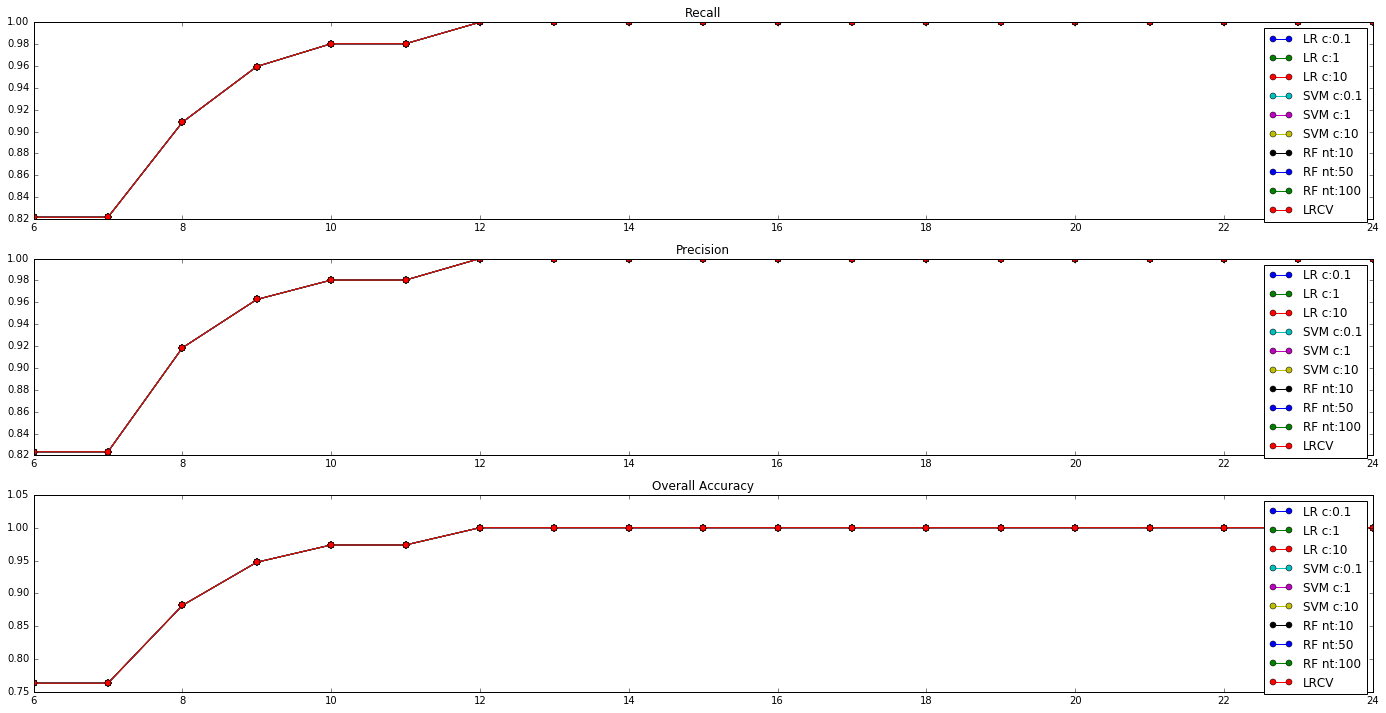

In [375]:
models.append(sm2)
modelnames.append('LRCV')
plt.figure(figsize=(24,12))
for model, modelname in izip(models, modelnames):
    plot_results(model, modelname, labelclass='gram', label='macro')
    
plt.subplot(3,1,1)
plt.title('Recall')
plt.legend()
plt.subplot(3,1,2)

plt.title('Precision')
plt.legend()
plt.subplot(3,1,3)
plt.title('Overall Accuracy')
plt.legend()

In [365]:
sm.scores_test['classification']['micro']

,time,confusion_matrix,accuracy,precision,recall,f1,overall_accuracy
1,6,"[[2, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0...",0.96,0.9,0.9,0.9,0.9
2,7,"[[2, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0...",0.96,0.9,0.9,0.9,0.9
3,8,"[[2, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0...",0.96,0.9,0.9,0.9,0.9
4,9,"[[2, 0, 0, 0, 0], [0, 1, 0, 1, 0], [0, 0, 2, 0...",0.92,0.8,0.8,0.8,0.8
5,10,"[[2, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0...",0.96,0.9,0.9,0.9,0.9
6,11,"[[2, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0...",0.96,0.9,0.9,0.9,0.9
7,12,"[[2, 0, 0, 0, 0], [0, 1, 0, 1, 0], [0, 0, 2, 0...",0.92,0.8,0.8,0.8,0.8
8,13,"[[2, 0, 1, 0, 0], [0, 1, 0, 1, 0], [0, 0, 1, 0...",0.88,0.7,0.7,0.7,0.7
9,14,"[[2, 0, 1, 0, 0], [0, 1, 0, 1, 0], [0, 0, 1, 0...",0.88,0.7,0.7,0.7,0.7
10,15,"[[2, 0, 1, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0...",0.92,0.8,0.8,0.8,0.8


In [366]:
print sm.scores_test['classification']['micro'].iloc[0]['confusion_matrix']
print sm.confusion_labels['classification']

[[2 0 0 0 0]
 [0 1 0 0 0]
 [0 0 2 0 0]
 [0 1 0 2 0]
 [0 0 0 0 2]]
['Control' '1' '2' '3' '4']


In [367]:
sm.fold_predictions_test[0]['classification']

array(['1', '3', 'Control', '4', 'Control'], dtype=object)

In [368]:
sm2 = SeriesModel(nfolds=2, fold_size=0.1, max_time=25, color_vector_type='I', reference_time = 5, 
                  detection_reducer = None, detection_scaler = None, detection_featurizer = None, 
                  detection_model = 'LRCV', use_last_timestep_results = False)
sm2.on_disk = False
sm2.verbose = True
sm2.number_of_columns = 3
sm2.fit(X,y,verbose=True)


>> i. Setting-up SeriesModel ...

>> Set-up completed (0.024050951004 seconds) <<

>> 0. Preprocessing data ...

>> Prepocessing completed (9.70363616943e-05 seconds) <<

>> 1. Featurizing data ...
Featurizing nt=6 ...
... 0 seconds
Featurizing nt=7 ...
... 0 seconds
Featurizing nt=8 ...
... 0 seconds
Featurizing nt=9 ...
... 0 seconds
Featurizing nt=10 ...
... 0 seconds
Featurizing nt=11 ...
... 0 seconds
Featurizing nt=12 ...
... 0 seconds
Featurizing nt=13 ...
... 0 seconds
Featurizing nt=14 ...
... 0 seconds
Featurizing nt=15 ...
... 0 seconds
Featurizing nt=16 ...
... 0 seconds
Featurizing nt=17 ...
... 0 seconds
Featurizing nt=18 ...
... 0 seconds
Featurizing nt=19 ...
... 0 seconds
Featurizing nt=20 ...
... 0 seconds
Featurizing nt=21 ...
... 0 seconds
Featurizing nt=22 ...
... 0 seconds
Featurizing nt=23 ...
... 0 seconds
Featurizing nt=24 ...
... 0 seconds

>> Featurizing completed (0.0215201377869 seconds) <<

>> Pickling featurizers to featurizer.pkl ...
Writing featurizer.

In [369]:
sm2.scores_test['classification']['micro']

,time,confusion_matrix,accuracy,precision,recall,f1,overall_accuracy
1,6,"[[2, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0...",0.96,0.9,0.9,0.9,0.9
2,7,"[[2, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0...",0.96,0.9,0.9,0.9,0.9
3,8,"[[2, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0...",0.96,0.9,0.9,0.9,0.9
4,9,"[[2, 0, 0, 0, 0], [0, 1, 0, 1, 0], [0, 0, 2, 0...",0.92,0.8,0.8,0.8,0.8
5,10,"[[2, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0...",0.96,0.9,0.9,0.9,0.9
6,11,"[[2, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0...",0.96,0.9,0.9,0.9,0.9
7,12,"[[2, 0, 0, 0, 0], [0, 1, 0, 1, 0], [0, 0, 2, 0...",0.92,0.8,0.8,0.8,0.8
8,13,"[[2, 0, 1, 0, 0], [0, 1, 0, 1, 0], [0, 0, 1, 0...",0.88,0.7,0.7,0.7,0.7
9,14,"[[2, 0, 1, 0, 0], [0, 1, 0, 1, 0], [0, 0, 1, 0...",0.88,0.7,0.7,0.7,0.7
10,15,"[[2, 0, 1, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0...",0.92,0.8,0.8,0.8,0.8


In [370]:
sm.results[['time', 'fold', 'test_classification_predictions']].iloc[0:4]

,time,fold,test_classification_predictions
1,6,0,"[1, 3, 2, 4, Control]"
2,6,1,"[Control, 4, 2, 3, 3]"
3,7,0,"[1, 3, 2, 4, Control]"
4,7,1,"[Control, 4, 2, 3, 3]"


In [371]:
idx = np.hstack((sm.folds[0]['test'], sm.folds[1]['test']))
y.iloc[idx]

,classification,gram,detection
15,1,1,1
17,3,2,1
42,2,1,1
7,4,2,1
31,Control,Control,0
34,Control,Control,0
16,4,2,1
38,2,1,1
11,3,2,1
9,1,1,1


In [372]:
from sklearn.metrics import accuracy_score
yt = y.iloc[idx]['classification'].values
yp = sm.results[sm.results['time'] == 6]['test_classification_predictions'].values
yp = np.hstack(yp)
print yt.shape, yp.shape
print yt
print yp

print 'ACC', accuracy_score(yt, yp)

(10,) (10,)
['1' '3' '2' '4' 'Control' 'Control' '4' '2' '3' '1']
['1' '3' '2' '4' 'Control' 'Control' '4' '2' '3' '3']
ACC 0.9


In [373]:
STP = SpotTimePlot(y, ['time', 'A','B'])

                gram  detection
classification                 
1                 10         10
2                  8          8
3                 10         10
4                 10         10
Control            5          5


['classification', 'gram', 'detection']
1 classification True averages classification
1
10
0     [3.79126764094, 1.68824417303, 3.59043776492, ...
3     [-2.50902968966, 5.61250344237, 6.11696184696,...
6     [0.02234240241, 5.68614497428, 5.53949753507, ...
9     [5.38664863724, -0.602527921131, 8.68552569231...
12    [1.95232399473, -1.09915646607, 1.64361655967,...
Name: data, dtype: object
0     [3.79126764094, 1.68824417303, 3.59043776492, ...
3     [-2.50902968966, 5.61250344237, 6.11696184696,...
6     [0.02234240241, 5.68614497428, 5.53949753507, ...
9     [5.38664863724, -0.602527921131, 8.68552569231...
12    [1.95232399473, -1.09915646607, 1.64361655967,...
15    [2.33754879528, 2.53022959125, 6.70527264679, ...
18    [2.27081664468, 2.38132540046, 2.87532136019, ...
21    [1.72202959484, 3.00354384574, 5.86921657731, ...
24    [1.42178545239, 2.63848556376, 3.30420347947, ...
27    [0.0955985299121, 0.70190292514, 8.6381153892,...
Name: data, dtype: object
4
10
1     [3.042

TypeError: not enough arguments for format string

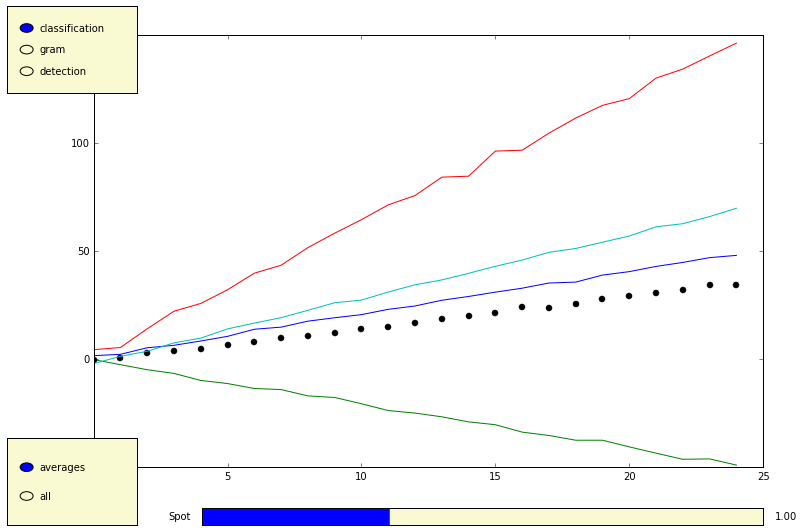

In [376]:
# View results
STP.plot_raws(X)
y.columns.values